
# Image Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im = cv2.imread('berlin.jpg') 
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)
ar=np.array(im.shape)
print(ar[0], ar[1],ar[2])


(900, 1600, 3)
900 1600 3


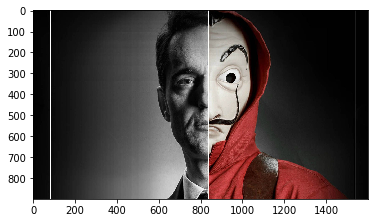

In [3]:
plt.imshow(im)
plt.show()

In [4]:
all_pixels = im.reshape((ar[0]*ar[1],ar[2]))
print(all_pixels.shape)

(1440000, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 12  10  10]
 [125  85  84]
 [189 187 183]
 [ 55  48  46]]


# Plot all colors

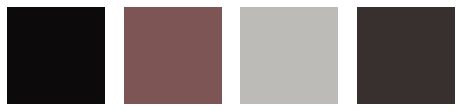

In [8]:
plt.figure(0,figsize=(8,2))

i = 1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i += 1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [9]:
p = km.labels_

In [10]:
new_img = np.zeros((ar[0]*ar[1],ar[2]), dtype="uint8")
new_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

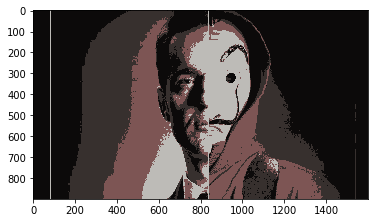

In [11]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()